# Machine Learning with Linear Regression

Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import linear_model

Load `mtcars` dataset

In [2]:
mtcars = pd.read_csv('https://raw.githubusercontent.com/evdoks/' \
                     'data_science/master/data/mtcars.csv')
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Linear Regression

Draw scatter plot for `wt` and `mpg` collumns

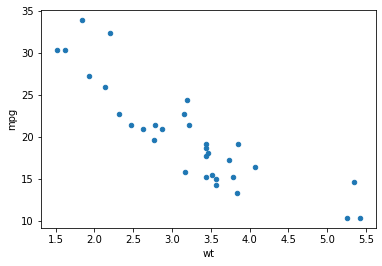

In [6]:
mtcars.plot(kind="scatter",
            x="wt",
            y="mpg")

In [8]:
%config IPCompleter.greedy=True

Python's scikit-learn library contains a wide range of functions for predictive modeling. Let's use a linear regression to see if we can predict mileage `mpg` based on car's weight `wt`.

First we initialise a linear regression training model.

In [9]:
regression_model = linear_model.LinearRegression()

Train the model using the `mtcars` data.

In [10]:
regression_model.fit(X = pd.DataFrame(mtcars["wt"]), 
                     y = pd.DataFrame(mtcars["mpg"]))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Check parameters of the model: coefficients and intercept

In [11]:
print('Intercept: ', regression_model.intercept_)
print('Coefficients: ', regression_model.coef_)

Intercept:  [37.28512617]
Coefficients:  [[-5.34447157]]


So the resulting model is $y = -5.34447157x + 37.28512617$

Use our trained model to generate 'predictions' for already known values.

In [12]:
predictions = regression_model.predict(X = pd.DataFrame(mtcars["wt"]))

Now that we have a linear model, let's plot the line it fits on our 
scatterplot to get a sense of how well it fits the data

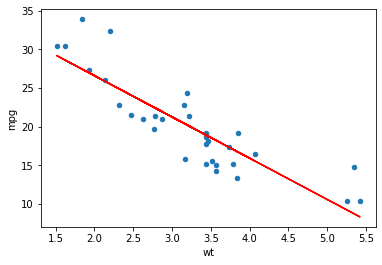

In [16]:
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg")

plt.plot(mtcars["wt"],
         predictions,color='red')

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

Calculate RMSE for `mtcars` predictions

In [17]:
def rmse(predicted, targets):
    return (np.mean((targets-predicted)**2))**0.5

rmse(predictions.flatten(), mtcars["mpg"])
#flatten : to convert array from two dim to one dim

2.949162685955028

Alternatively we can claculate RMSE using `sklearn.metrics.mean_squared_error`
method

In [19]:
from sklearn.metrics import mean_squared_error

mean_squared_error(predictions, mtcars["mpg"])**0.5

2.949162685955028

## Outliers

* Outliers can have a large influence on linear regression models
  
  * regression deals with minimizing squared residuals, large residuals have a disproportionately large influence on the model
  * plotting the result helps us detect influential outliers. 
  
* In `mtcars` dataset there does not appear to be any influential outliers. 
* Let's add an outlier - a super heavy fuel efficient car

In [21]:
mtcars_subset = mtcars[["mpg","wt"]]
super_car = pd.DataFrame({"mpg":50,"wt":10}, index=["super"])
new_cars = mtcars_subset.append(super_car)

Fit the linear regression model with an outlier in the dataset

In [22]:
regression_model_outlier = linear_model.LinearRegression()
regression_model_outlier.fit(X = pd.DataFrame(new_cars["wt"]), 
                     y = new_cars["mpg"])
predictions_outlier = \
    regression_model_outlier.predict(X = pd.DataFrame(new_cars["wt"]))

Plot the new model

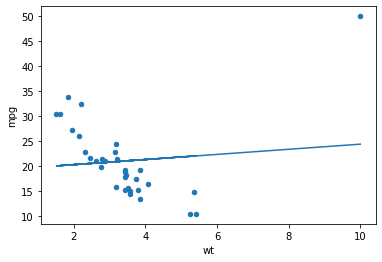

In [23]:
new_cars.plot(kind="scatter",
           x="wt",
           y="mpg")

plt.plot(new_cars["wt"],
         predictions_outlier)

Let's calculate RMSE for this model

In [24]:
mean_squared_error(predictions_outlier, new_cars['mpg'])**0.5

7.734156532888061

## Polynomial Regression

* Variables often exhibit **non-linear** relationships that can't be fit well with a straight line. 
* In these cases, we can use linear regression to fit a curved line the data by adding extra **higher order terms** (squared, cubic, etc.) to the model. 
* A linear regression that involves higher order terms is known as **polynomial regression**.

### Quadratic Regression

* Quadratic regression is a polynomial regression with first- and second-order terms
* Quadratic regression can be expressed as:

$response=a_0+c_1x+c_2x^2$

or

$response=a_0+c_1x_1+c_2x_2$, where $x_1=x$, $x_2=x^2$ 
* The right side if the equation defines a **quadratic curve** with a certain **y-intercept**. 
* The model is designed to fit a line that minimizes the squared differences between observed and predicted values

Let's fit quadratic regression model for `mtcars` dataset.

First, initialise the linear regression model.

In [25]:
poly_model = linear_model.LinearRegression()

Make the model quadratic by adding a column (dimenstion) with squares of the independent variables to the training data set.

In [26]:
predictors = pd.DataFrame({"wt": mtcars["wt"],
                           "wt**2": mtcars["wt"]**2})

Train the model using the data set that includes `wt` as well as `wt` squared values.

In [27]:
poly_model.fit(X = predictors, 
               y = mtcars["mpg"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Check intercept and coefficients of the model.

In [28]:
print("Model intercept: ", poly_model.intercept_)
print("Model Coefficients: ", poly_model.coef_)

Model intercept:  49.9308109494518
Model Coefficients:  [-13.38033708   1.17108689]


So the resulting model is $y = 1.17108689x^2 - 13.38033708x + 49.9308109494518$

Let's compute RMSE

In [29]:
preds = poly_model.predict(X=predictors)
print(mean_squared_error(preds , mtcars["mpg"])**0.5)

2.5233004724610795


Let's plot the quadratic model

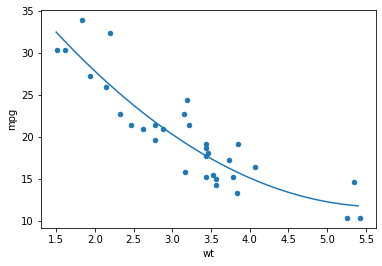

In [30]:
# Plot the curve from 1.5 to 5.5
poly_line_range = np.arange(1.5, 5.5, 0.1)

# Get first and second order predictors from range
poly_predictors = pd.DataFrame({"p": poly_line_range,
                               "p**2": poly_line_range**2})

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg")

# Plot curve line
plt.plot(poly_line_range, 
         y_values)

## Overfitting

* RMSE of the quadratic model is **lower** than the old one ⇒ it is probably a better model.
* Increasing the order of the polynomial regression allows for more flexible regression curves!
* Be careful about **overfitting** the training data.
* Overfitting describes a situation where our model fits the data we use to create it (training data) **too closely**, resulting in **poor generalization** to new data.

### Overfittin example

Let's build a regression model with polynomial of power of 10.

In [33]:
# Initialize model
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = \
    pd.DataFrame({"wt": mtcars["wt"], "wt**2": mtcars["wt"]**2, 
                  "wt**3": mtcars["wt"]**3, "wt**4": mtcars["wt"]**4, 
                  "wt**5": mtcars["wt"]**5, "wt**6": mtcars["wt"]**6,
                  "wt**7": mtcars["wt"]**7, "wt**8": mtcars["wt"]**8, 
                  "wt**9": mtcars["wt"]**9, "wt**10": mtcars["wt"]**10})
predictors.head()
# Train the model using the new_cars data
poly_model.fit(X = predictors, 
               y = mtcars["mpg"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Print model's coefficients

In [34]:
print("Model intercept: ", poly_model.intercept_)
print("Model Coefficients: ", poly_model.coef_)

Model intercept:  -14921.121778327226
Model Coefficients:  [ 6.45813620e+04 -1.20086141e+05  1.26931937e+05 -8.46598507e+04
  3.73155219e+04 -1.10334761e+04  2.16590414e+03 -2.70730555e+02
  1.94974169e+01 -6.15515457e-01]


Compute RMSE

In [35]:
preds = poly_model.predict(X=predictors)
print("RMSE: ", mean_squared_error(preds , mtcars["mpg"])**0.5)

RMSE:  2.1370900291806


Now let's plot the model.

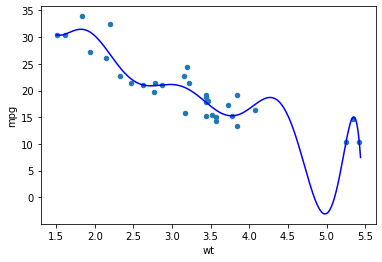

In [36]:
p_range = np.arange(1.5, 5.45, 0.01)

poly_predictors = \
    pd.DataFrame({"p_range": p_range, "p_range**2": p_range**2, 
                  "p_range**3": p_range**3, "p_range**4": p_range**4, 
                  "p_range**5": p_range**5, "p_range**6": p_range**6, 
                  "p_range**7": p_range**7, "p_range**8": p_range**8, 
                  "p_range**9": p_range**9, "p_range**10": p_range**10})

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg")

# Plot curve line
plt.plot(p_range,           # X-axis range
         y_values,          # Predicted values
         color="blue")

Notice how the 10th order polynomial model curves wildly in some places to fit the training data. While this model happens to yield a closer fit to the training data, it will almost certainly fail to generalize well to new data as it leads to absurd predictions such as a car having less than 0 mpg if it weighs 5000lbs.

## Cross-Validation

To prevent overfitting always use *cross-validation* when evaluating your model.

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.

### Simple linear model

Let's examine cross-validatin for our initial linear regression model.

First, let's split our data set into *training* and *test* sets using `train_test_split` function of `sklearn.model_selection` module.

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(pd.DataFrame(mtcars["wt"]),
                     pd.DataFrame(mtcars["mpg"]), 
                     test_size=0.3, random_state=101)

In [38]:
X_train.head()

,wt
18,1.615
10,3.440
3,3.215
1,2.875
20,2.465


In [39]:
y_train.head()

,mpg
18,30.4
10,17.8
3,21.4
1,21.0
20,21.5


Let's train a linear model, but only using `X_train` and `y_train` as a data set.

In [40]:
regression_model = linear_model.LinearRegression()
regression_model.fit(X = pd.DataFrame(X_train), 
                     y = pd.DataFrame(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Computing RMSE on training and testing sets produces different values, since the model was created based on the data on the training set. But the difference is not so big, so we can assume that there is no overfitting.

In [41]:
y_train_pred = regression_model.predict(X_train)
print("RMSE on training set: ", mean_squared_error(y_train_pred , y_train)**0.5)

y_test_pred = regression_model.predict(X_test)
print("RMSE on test set: ", mean_squared_error(y_test_pred , y_test)**0.5)

RMSE on training set:  2.4463894549598666
RMSE on test set:  3.9098115403341906


### Complex polinomial model

Let's now use cross-validation for testing our regression model where we used power of 10 polynomial.

First, initialize the model and split the data set into testing and training sets.

In [42]:
# Initialize model
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
X = pd.DataFrame({"wt": mtcars["wt"], "wt**2": mtcars["wt"]**2, 
                  "wt**3": mtcars["wt"]**3, "wt**4": mtcars["wt"]**4, 
                  "wt**5": mtcars["wt"]**5, "wt**6": mtcars["wt"]**6,
                  "wt**7": mtcars["wt"]**7, "wt**8": mtcars["wt"]**8, 
                  "wt**9": mtcars["wt"]**9,"wt**10": mtcars["wt"]**10})

X_train, X_test, y_train, y_test = \
    train_test_split(X, mtcars["mpg"], 
                     test_size=0.3, random_state=101)

Train the model and compute predicted values for the test set.

In [43]:
poly_model.fit(X = X_train, 
               y = y_train)
y_test_pred = poly_model.predict(X=X_test)

Calculate RMSE for training and testing sets.

In [44]:
y_train_pred = poly_model.predict(X_train)
print("RMSE on training set: ", mean_squared_error(y_train_pred , y_train)**0.5)
print("RMSE on test set: ", mean_squared_error(y_test_pred , y_test)**0.5)

RMSE on training set:  1.066743331147857
RMSE on test set:  7.061622913161053


The difference between RMESs is so significant, that it is safe to assume that our model is overfitting the training set.

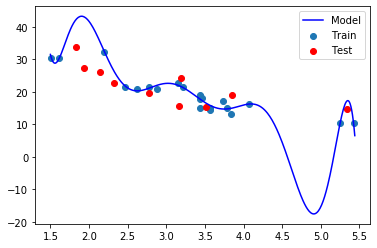

In [45]:
p_range = np.arange(1.5, 5.45, 0.01)

poly_predictors = \
    pd.DataFrame({"p_range": p_range, "p_range**2": p_range**2, 
                  "p_range**3": p_range**3, "p_range**4": p_range**4, 
                  "p_range**5": p_range**5, "p_range**6": p_range**6, 
                  "p_range**7": p_range**7, "p_range**8": p_range**8, 
                  "p_range**9": p_range**9, "p_range**10": p_range**10})

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

plt.scatter(x=X_train.wt, y=y_train)

# Plot curve line
plt.plot(p_range,   # X-axis range
         y_values,          # Predicted values
         color="blue")

plt.scatter(x=X_test.wt, y=y_test, color='red')
plt.legend(('Model', 'Train', 'Test'))

In [46]:
y_train_pred = poly_model.predict(X_train)
print("RMSE on training set: ", mean_squared_error(y_train_pred , y_train)**0.5)
print("RMSE on test set: ", mean_squared_error(y_test_pred , y_test)**0.5)

RMSE on training set:  1.066743331147857
RMSE on test set:  7.061622913161053


## Multiple Linear Regression

* Often dataset has several variables that may help explain variation in the response variable.
* One can include more explanatory variables in a linear regression model by including more columns in the data frame you pass to the model training function.
* Regression with several explanatory variables is called **multiple regression**.

Let's add another variable to our model. We will build a model that additionally considers the horsepower variable and compare its performance with the previous models.

In [47]:
multi_reg_model = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = \
    train_test_split(mtcars[["wt","hp"]], mtcars["mpg"], 
                     test_size=0.3, random_state=101)
multi_reg_model.fit(X = X_train, 
                    y = y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Print model's coefficients

In [48]:
print("Model intercept: ", multi_reg_model.intercept_)
print("Model Coefficients: ", multi_reg_model.coef_)

Model intercept:  38.08536676765514
Model Coefficients:  [-4.54242784 -0.02504269]


When working with multidimensional models, it becomes difficult to visualise results, so you rely heavily on numeric output. Compute RMSE to evaluate the model.

In [49]:
y_test_pred = multi_reg_model.predict(X=X_test)
print("RMSE: ", mean_squared_error(y_test_pred , y_test)**0.5)

RMSE:  3.3116136832580305


And finally, let's train a quadratic model which considers weight and horsepower.

In [50]:
multi_reg_model = linear_model.LinearRegression()

X = pd.DataFrame({"wt": mtcars["wt"], "wt**2": mtcars["wt"]**2,
                  "hp": mtcars["hp"], "hp**2": mtcars["hp"]**2})

X_train, X_test, y_train, y_test = \
    train_test_split(X, mtcars["mpg"], 
     test_size=0.3, random_state=101)

multi_reg_model.fit(X = X_train, 
                    y = y_train)

y_test_pred = multi_reg_model.predict(X = X_test)
print("RMSE: ", mean_squared_error(y_test_pred , y_test)**0.5)

RMSE:  2.582736134236003


## Conclusion

* mpg does tend to **decline** with horsepower
* the relationship appears more **curved** than linear 
* adding **polynomial** terms to our multiple regression model could yield a better fit